In [1]:
# import pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# read in the csv from https://raw.githubusercontent.com/fivethirtyeight/data/master/flying-etiquette-survey/flying-etiquette.csv
tdf = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/flying-etiquette-survey/flying-etiquette.csv',\
                 #usecols=useColsList, 
                  #header=None
                 )
tdf.columns


Index([u'RespondentID', u'How often do you travel by plane?',
       u'Do you ever recline your seat when you fly?', u'How tall are you?',
       u'Do you have any children under 18?',
       u'In a row of three seats, who should get to use the two arm rests?',
       u'In a row of two seats, who should get to use the middle arm rest?',
       u'Who should have control over the window shade?',
       u'Is itrude to move to an unsold seat on a plane?',
       u'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?',
       u'On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?',
       u'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?',
       u'Is itrude to recline your seat on a plane?',
       u'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirel

In [3]:
# view the head
tdf.head()

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific


In [4]:
# view the columns - use iteration to print them out
colList = tdf.columns
for item in colList:
    print item

RespondentID
How often do you travel by plane?
Do you ever recline your seat when you fly?
How tall are you?
Do you have any children under 18?
In a row of three seats, who should get to use the two arm rests?
In a row of two seats, who should get to use the middle arm rest?
Who should have control over the window shade?
Is itrude to move to an unsold seat on a plane?
Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?
On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?
Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?
Is itrude to recline your seat on a plane?
Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?
Is it rude to ask someone to switch seats with you in order to be closer to friends?
Is itrude to ask someone to switch seats with you 

In [5]:
# rename columns with shorter name
tdf.columns = ['ID','plane','recline','tall','children','three','two','shadeControl','rude','talk',\
              'getUp','obligation','rudeRecline','elimRecline',1,2,3,4,5,6,7,8,9,10,11,12,13]


In [6]:
# view head again - now just 3 rows
tdf.head(3)


,ID,plane,recline,tall,children,three,two,shadeControl,rude,talk,...,4,5,6,7,8,9,10,11,12,13
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific


In [7]:
# view the last 3 rows

tdf.tail(3)

,ID,plane,recline,tall,children,three,two,shadeControl,rude,talk,...,4,5,6,7,8,9,10,11,12,13
1037,3431731485,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,> 60,NaN,Some college or Associate degree,East North Central
1038,3431731196,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,30-44,"$50,000 - $99,999",Bachelor degree,New England
1039,3431729581,Once a year or less,Once in a while,"6'3""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,> 60,"$50,000 - $99,999",Bachelor degree,Pacific


In [8]:
# check the data type of the DataFrame
type(tdf)


pandas.core.frame.DataFrame

In [9]:
# How many unique travel frequencies are there? What are they?

tdf['plane'].unique()

array(['Once a year or less', 'Once a month or less', 'Never',
       'A few times per week', 'Every day', 'A few times per month'], dtype=object)

In [10]:
# How many unique regions are there? What are they?

tdf[13].unique()

array([nan, 'Pacific', 'East North Central', 'New England', 'Mountain',
       'South Atlantic', 'East South Central', 'Middle Atlantic',
       'West North Central', 'West South Central'], dtype=object)

In [11]:
# Select just those columns that relate to the personal characteristics of the person
# Save that as a DataFrame name char



In [12]:
# read in the csv from https://raw.githubusercontent.com/fivethirtyeight/data/master/flying-etiquette-survey/flying-etiquette.csv
char = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/flying-etiquette-survey/flying-etiquette.csv',\
                    usecols = [3]+range(22,27)
                    #header=None
                 )
char.columns
char.columns = ['height','gender','age', 'income','education','location']
char.columns

Index([u'height', u'gender', u'age', u'income', u'education', u'location'], dtype='object')

In [13]:
# From the new char DataFrame, select the height. Can you create a histogram?
char['height']
char['height'].unique()

array([nan, '6\'3"', '5\'8"', '5\'11"', '5\'7"', '5\'9"', '6\'2"', '6\'0"',
       '5\'6"', '6\'1"', '5\'10"', '5\'5"', '6\'4"', '6\'6" and above',
       'Under 5 ft.', '6\'5"', '5\'4"', '5\'0"', '5\'3"', '5\'1"', '5\'2"'], dtype=object)

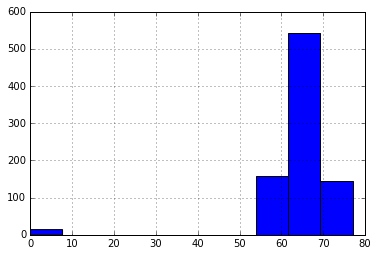

In [14]:
# Create a histogram by creating a list comprehension + a function to turn the data into inches
h = '5\'3"'
h
def ft2inches(h):
    if type(h) == type('str') and len(h) < 6:
        f = h.split('\'')
        f[0] = int(f[0])
        f
        f[1] = int(f[1][0])
        f
        h = f[0] * 12 + f[1]
    else:
        h = 0
    return h

char_ht = char['height'].dropna()
char_ht
type(char_ht)
char_ht = char_ht.apply(ft2inches)
type(char_ht[3])
char_ht.hist()

In [24]:
# Slice the first 3 columns using .iloc notation, then use the double bracket notation

tdf.iloc[:,2:4]
tdf[['ID','plane']]

,ID,plane
0,3436139758,Once a year or less
1,3434278696,Once a year or less
2,3434275578,Once a year or less
3,3434268208,Once a year or less
4,3434250245,Once a month or less
5,3434245875,Once a year or less
6,3434235351,Once a month or less
7,3434218031,Once a year or less
8,3434213681,Once a year or less
9,3434172894,Once a year or less


In [ ]:
tdf.iloc[1:2,2:3]

In [ ]:
## Create a dictionary using .unique and a dictionary comprehension
## Then use a list comprehension with a function to update the count the number of degrees
## How many degreee of each type are there?



In [ ]:
# Now use the education column with the .value_counts() method to check your work. Are they the same?

